# Linear Regression and Temperature

In this notebook, we'll look at using linear regression to study changes in temperature.

## Setup

In [69]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%config InlineBackend.figure_format ='retina'

## Getting our data

We'll be getting data from [North America Land Data Assimilation System (NLDAS)](https://wonder.cdc.gov/NASA-NLDAS.html), which provides the daily average temperature from 1979-2011 for the United States.

For the next step, you will need to choose some settings in the data request form. These are:

- GroupBy: Month Day, Year
- Your State
- Export Results (check box)
- Show Zero Values (check box)

>1) Download the data for your home state (or state of your choosing) and upload it to M2 in your work directory.

# Loading our data

In [107]:
df = pd.read_csv('~/ds_1300_notebooks/data/temp_data.txt',delimiter='\t',skipfooter=14,engine='python')



In [108]:
df

,Notes,"Month Day, Year","Month Day, Year Code",Avg Daily Max Air Temperature (F)
0,NaN,"Jan 01, 1979",1979/01/01,29.03
1,NaN,"Jan 02, 1979",1979/01/02,31.35
2,NaN,"Jan 03, 1979",1979/01/03,41.66
3,NaN,"Jan 04, 1979",1979/01/04,47.30
4,NaN,"Jan 05, 1979",1979/01/05,46.89
...,...,...,...,...
12049,NaN,"Dec 28, 2011",2011/12/28,59.91
12050,NaN,"Dec 29, 2011",2011/12/29,66.64
12051,NaN,"Dec 30, 2011",2011/12/30,68.61
12052,NaN,"Dec 31, 2011",2011/12/31,73.49


### Clean the data

>2) Drop any rows that have the value "Total" in the Notes column, then drop the Notes column

In [109]:
df=df[df.Notes != 'Total']


In [110]:
df.head()

,Notes,"Month Day, Year","Month Day, Year Code",Avg Daily Max Air Temperature (F)
0,NaN,"Jan 01, 1979",1979/01/01,29.03
1,NaN,"Jan 02, 1979",1979/01/02,31.35
2,NaN,"Jan 03, 1979",1979/01/03,41.66
3,NaN,"Jan 04, 1979",1979/01/04,47.30
4,NaN,"Jan 05, 1979",1979/01/05,46.89


In [111]:
df=df.drop(columns=['Notes'])

In [112]:
df.head()

,"Month Day, Year","Month Day, Year Code",Avg Daily Max Air Temperature (F)
0,"Jan 01, 1979",1979/01/01,29.03
1,"Jan 02, 1979",1979/01/02,31.35
2,"Jan 03, 1979",1979/01/03,41.66
3,"Jan 04, 1979",1979/01/04,47.30
4,"Jan 05, 1979",1979/01/05,46.89


>3) Make a column called Date that is in the pandas datetime format

In [113]:
df['Date1']=df['Month Day, Year Code']
df['Date'] = pd.to_datetime(df['Date1'],errors='raise')
df[['Date1','Date']]

,Date1,Date
0,1979/01/01,1979-01-01
1,1979/01/02,1979-01-02
2,1979/01/03,1979-01-03
3,1979/01/04,1979-01-04
4,1979/01/05,1979-01-05
...,...,...
12048,2011/12/27,2011-12-27
12049,2011/12/28,2011-12-28
12050,2011/12/29,2011-12-29
12051,2011/12/30,2011-12-30


In [114]:
df

,"Month Day, Year","Month Day, Year Code",Avg Daily Max Air Temperature (F),Date1,Date
0,"Jan 01, 1979",1979/01/01,29.03,1979/01/01,1979-01-01
1,"Jan 02, 1979",1979/01/02,31.35,1979/01/02,1979-01-02
2,"Jan 03, 1979",1979/01/03,41.66,1979/01/03,1979-01-03
3,"Jan 04, 1979",1979/01/04,47.30,1979/01/04,1979-01-04
4,"Jan 05, 1979",1979/01/05,46.89,1979/01/05,1979-01-05
...,...,...,...,...,...
12048,"Dec 27, 2011",2011/12/27,56.67,2011/12/27,2011-12-27
12049,"Dec 28, 2011",2011/12/28,59.91,2011/12/28,2011-12-28
12050,"Dec 29, 2011",2011/12/29,66.64,2011/12/29,2011-12-29
12051,"Dec 30, 2011",2011/12/30,68.61,2011/12/30,2011-12-30


>4) Make columns for 'Year', 'Month', and 'Day' by splitting the column 'Month Day, Year'

In [115]:
df['Year'] = df['Month Day, Year Code'].apply(lambda x : x.split('/')[0])
df['Month'] = df['Month Day, Year Code'].apply(lambda x : x.split('/')[1])
df['Day'] = df['Month Day, Year Code'].apply(lambda x : x.split('/')[2])

In [116]:
df

,"Month Day, Year","Month Day, Year Code",Avg Daily Max Air Temperature (F),Date1,Date,Year,Month,Day
0,"Jan 01, 1979",1979/01/01,29.03,1979/01/01,1979-01-01,1979,01,01
1,"Jan 02, 1979",1979/01/02,31.35,1979/01/02,1979-01-02,1979,01,02
2,"Jan 03, 1979",1979/01/03,41.66,1979/01/03,1979-01-03,1979,01,03
3,"Jan 04, 1979",1979/01/04,47.30,1979/01/04,1979-01-04,1979,01,04
4,"Jan 05, 1979",1979/01/05,46.89,1979/01/05,1979-01-05,1979,01,05
...,...,...,...,...,...,...,...,...
12048,"Dec 27, 2011",2011/12/27,56.67,2011/12/27,2011-12-27,2011,12,27
12049,"Dec 28, 2011",2011/12/28,59.91,2011/12/28,2011-12-28,2011,12,28
12050,"Dec 29, 2011",2011/12/29,66.64,2011/12/29,2011-12-29,2011,12,29
12051,"Dec 30, 2011",2011/12/30,68.61,2011/12/30,2011-12-30,2011,12,30


In [117]:
df['DateInt'] = df['Date'].astype(int)/10e10 # This will be used later

## Generating a scatter plot

> 4) Use df.plot.scatter to plot 'Date' vs 'Avg Daily Max Air Temperature (F)'. You might want to add figsize=(50,5) as an argument to make it more clear what is happening.

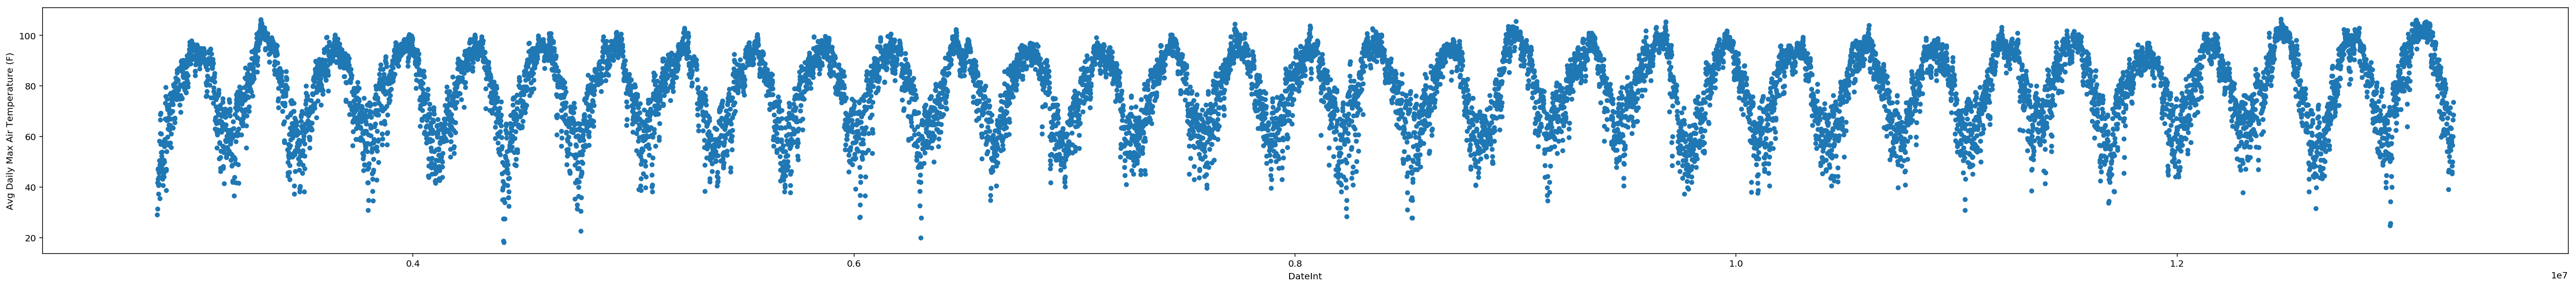

In [118]:
df.plot.scatter(x='DateInt', y='Avg Daily Max Air Temperature (F)',figsize=(50,5))

>5) Describe your plot.

This scatter plot shows the date and the average temperature and how they correlate with each other 

### Adding colors for our graph

In [119]:
# No need to edit this unless you want to try different colors or a pattern other than colors by month

cmap = matplotlib.cm.get_cmap("nipy_spectral", len(df['Month'].unique())) # Builds a discrete color mapping using a built in matplotlib color map

c = []
for i in range(cmap.N): # Converts our discrete map into Hex Values
    rgba = cmap(i)
    c.append(matplotlib.colors.rgb2hex(rgba))

df['color']=[c[int(i-1)] for i in df['Month'].astype(int)] # Adds a column to our dataframe with the color we want for each row

>6) Make the same plot as 4) but add color by adding the argument c=df\['color'\] to our plotting command.

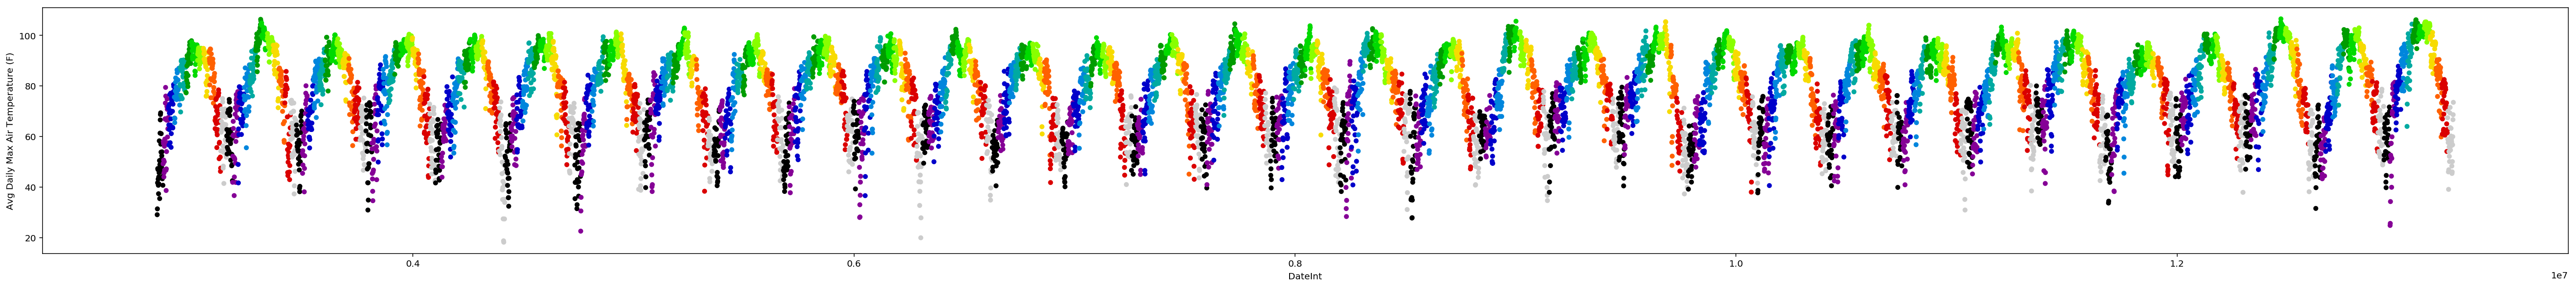

In [120]:
df.plot.scatter(x='DateInt', y='Avg Daily Max Air Temperature (F)',figsize=(50,5), c=df['color'])

## Pick a subset of the data

>7) Select a 6 month period from the data. # Hint use logic and pd.datetime(YYYY, MM, DD)

In [121]:
subset = df[df['Date'] < pd.datetime(1979,6,1)]# & (df['Date'] <= 1979-1-1)


In [123]:
subset

,"Month Day, Year","Month Day, Year Code",Avg Daily Max Air Temperature (F),Date1,Date,Year,Month,Day,DateInt,color
0,"Jan 01, 1979",1979/01/01,29.03,1979/01/01,1979-01-01,1979,01,01,2839968.0,#000000
1,"Jan 02, 1979",1979/01/02,31.35,1979/01/02,1979-01-02,1979,01,02,2840832.0,#000000
2,"Jan 03, 1979",1979/01/03,41.66,1979/01/03,1979-01-03,1979,01,03,2841696.0,#000000
3,"Jan 04, 1979",1979/01/04,47.30,1979/01/04,1979-01-04,1979,01,04,2842560.0,#000000
4,"Jan 05, 1979",1979/01/05,46.89,1979/01/05,1979-01-05,1979,01,05,2843424.0,#000000
...,...,...,...,...,...,...,...,...,...,...
146,"May 27, 1979",1979/05/27,87.63,1979/05/27,1979-05-27,1979,05,27,2966112.0,#00aaa1
147,"May 28, 1979",1979/05/28,88.70,1979/05/28,1979-05-28,1979,05,28,2966976.0,#00aaa1
148,"May 29, 1979",1979/05/29,89.72,1979/05/29,1979-05-29,1979,05,29,2967840.0,#00aaa1
149,"May 30, 1979",1979/05/30,88.80,1979/05/30,1979-05-30,1979,05,30,2968704.0,#00aaa1


>8) Plot the subset using the the same code you used in 6). You can change the figsize if needed.

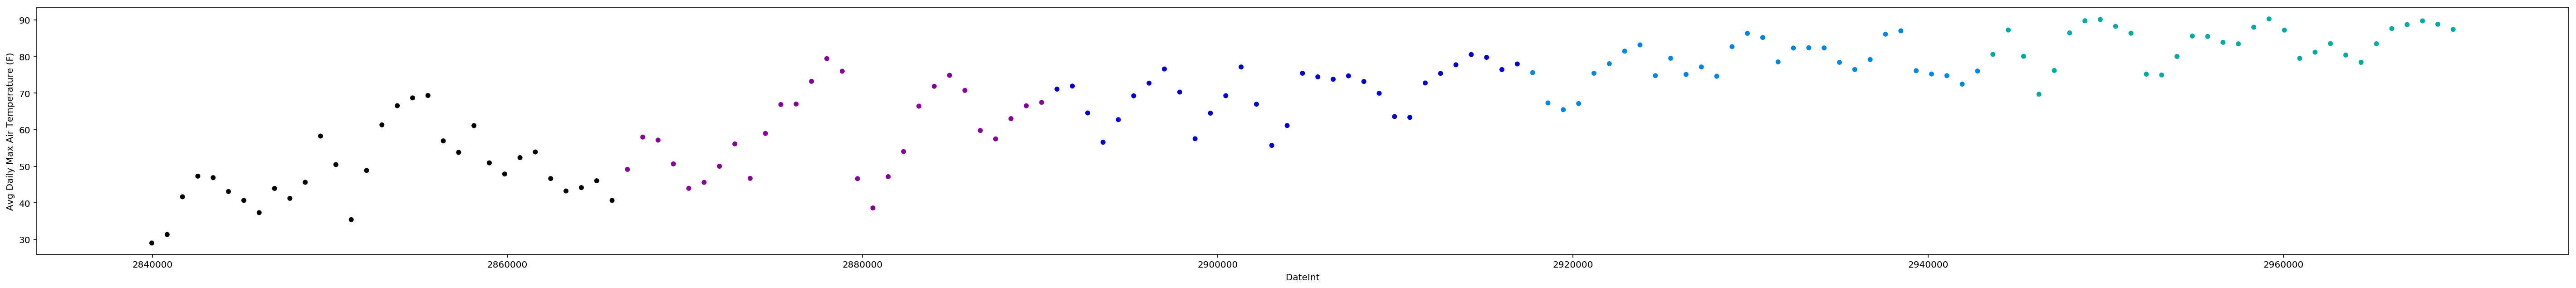

In [124]:
subset.plot.scatter(x='DateInt', y='Avg Daily Max Air Temperature (F)',figsize=(50,5), c=df['color'])

## Linear Regression

We are going to use a very [simple linear regression model](https://en.wikipedia.org/wiki/Simple_linear_regression). You may implement a more complex model if you wish.

The method described here is called the least squares method and is defined as:

$m = \frac{\sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y}))}{\sum_{i=1}^{n}(x_i-\bar{x})^2}$

$b = \bar{y} - m\bar{x}$

Where $\bar{x}$ and $\bar{y}$ are the average value of $x$ and $y$ respectively.

First we need to define our X and Y values.

In [125]:
X=subset['DateInt'].values
Y=subset['Avg Daily Max Air Temperature (F)'].values

In [126]:
def lin_reg(x,y):
    # Calculate the average x and y
    x_avg = np.mean(x)
    y_avg = np.mean(y)

    num = 0
    den = 0
    for i in range(len(x)): # This represents our sums
        num = num + (x[i] - x_avg)*(y[i] - y_avg) # Our numerator
        den = den + (x[i] - x_avg)**2 # Our denominator
    # Calculate slope
    m = num / den
    # Calculate intercept
    b = y_avg - m*x_avg

    print (m, b)
    
    # Calculate our predicted y values
    y_pred = m*x + b
    
    return y_pred

In [127]:
Y_pred = lin_reg(X,Y)

0.00034443088958599586 -932.4267269431856


In [139]:
Y_pred

array([45.74597769, 46.04356598, 46.34115427, 46.63874256, 46.93633085,
       47.23391914, 47.53150742, 47.82909571, 48.126684  , 48.42427229,
       48.72186058, 49.01944887, 49.31703716, 49.61462544, 49.91221373,
       50.20980202, 50.50739031, 50.8049786 , 51.10256689, 51.40015518,
       51.69774346, 51.99533175, 52.29292004, 52.59050833, 52.88809662,
       53.18568491, 53.4832732 , 53.78086148, 54.07844977, 54.37603806,
       54.67362635, 54.97121464, 55.26880293, 55.56639122, 55.86397951,
       56.16156779, 56.45915608, 56.75674437, 57.05433266, 57.35192095,
       57.64950924, 57.94709753, 58.24468581, 58.5422741 , 58.83986239,
       59.13745068, 59.43503897, 59.73262726, 60.03021555, 60.32780383,
       60.62539212, 60.92298041, 61.2205687 , 61.51815699, 61.81574528,
       62.11333357, 62.41092185, 62.70851014, 63.00609843, 63.30368672,
       63.60127501, 63.8988633 , 64.19645159, 64.49403987, 64.79162816,
       65.08921645, 65.38680474, 65.68439303, 65.98198132, 66.27

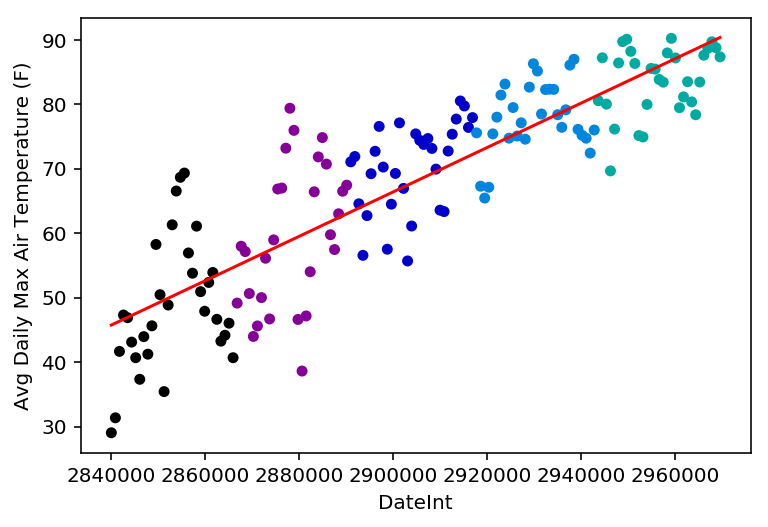

In [129]:
subset.plot.scatter(x='DateInt', y='Avg Daily Max Air Temperature (F)',c=subset['color'])
plt.plot([min(subset['DateInt'].values), max(subset['DateInt'].values)], [min(Y_pred), max(Y_pred)], color='red') # best fit line
plt.show()

>9) What are the slope and intercept of your best fit line?

0.00034443088958599586 -932.4267269431856

>10) What are the minimum and maximum Y values of your best fit line? Is your slope positive or negative?

Minimum value = 45.74597769, Maximum value = 90.38422098, The slope is positive, but really small. 

## Putting it all together

>11) Generate a best fit line for the full data set and plot the line over top of the data.

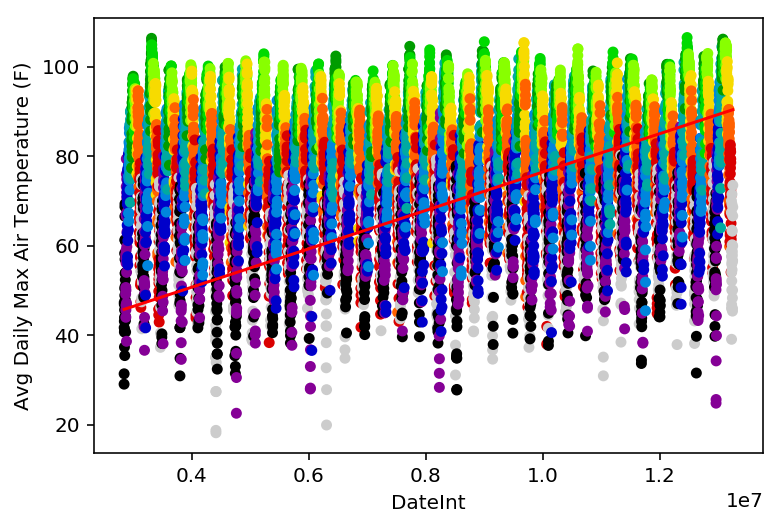

In [143]:
df.plot.scatter(x='DateInt', y='Avg Daily Max Air Temperature (F)',c=df['color'])
plt.plot([min(df['DateInt'].values), max(df['DateInt'].values)], [min(Y_pred), max(Y_pred)], color='red') # best fit line
plt.show()

>12) Is the slope positive or negative? What do you think that means?

The slope is positive meaning the average temperature has been going up. 